In [1]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
print(train_images.shape)

Using TensorFlow backend.


(60000, 28, 28)


In [2]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [3]:
print(test_images.shape)

(10000, 28, 28)


In [4]:
print(test_labels)

[7 2 1 ... 4 5 6]


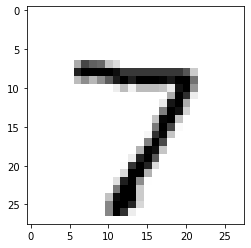

In [5]:
digit = test_images[0]
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

In [7]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32') / 255

In [9]:
'''
图片对应的标签是一个数值，用于表示图片内容。例如手写数字图片7，它对应的标签就是数字7，
但网络擅长于处理向量类型的数据，因为我们要将图片区分成10个分类，因此我们将标签转换为
含有10个元素的向量，对于数字7，我们将向量的第7个分量设置为1，其余设置为0
'''
from keras.utils import to_categorical
print("before change:", test_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("after change:", test_labels[0])

before change: 7
after change: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [10]:
'''
epochs = 5表示使用输入的数据循环训练网络5次，batch_size表示网络每次从
输入数据集中抽取出128份数据进行计算
'''
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.2541 - accuracy: 0.9268
Epoch 2/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.1031 - accuracy: 0.9701
Epoch 3/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.0689 - accuracy: 0.9792
Epoch 4/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.0505 - accuracy: 0.9846
Epoch 5/5
60000/60000 [==============================] - 7s 120us/step - loss: 0.0383 - accuracy: 0.9883


In [11]:
'''
让训练后的网络对测试数据进行预测，检验网络的预测准确率
'''
test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=1)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 99us/step
test_acc: 0.9764999747276306


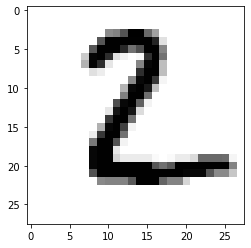

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
the number for the picture is  2


In [12]:
from keras.datasets import mnist
'''
上面代码只是检测网络的预测准确率，为了更形象的展示网络识别能力，我们专门从测试数据集中
抽取一张图片，让网络判断图片里面的数字
'''
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
digit = test_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#将抽取的图片输入网络，并让网络判断图片表示的数值
test_images = test_images.reshape(10000, 28*28)
res = network.predict(test_images)
print(res[1])

for i in range(res[1].shape[0]):
    if (res[1][i] == 1):
        print("the number for the picture is ", i)
        break